# ASSIGNMENT 3                                                McGill COMP451 - Fall 2022
Student name (ID) - **Kaggle team ID**


If you discussed solutions with any of your classmates please list their name here. You should not share any code with your classmates, but you can discuss your solution. This is an individual assignment. The team ID above is only needed because we need to link your report to your Kaggle submission.

**Note:** you can only use late days to submit the report (which has 5/20 pts). The competition, which is the main part of this assignment (15/20 pts), will close at the exact submission deadline. So please start early! 

## Objective
The objective of this assignment is to give you hands-on experience with deep learning packages, such as pyTorch. The task here is to build a model that takes an image as input and produces a single number. The image contains three digits consisting only of digits 1,2 and 3. The output of the model should be the product of these digits. It is up to you to choose the model architecture. You may choose to first predict each digit and then calculate their product, or calculate the product in one shot. You may approach this as a classification task since the output options are limited, or consider it as a regression task. The assignment has two deliverables: 
- you need upload your prediction for the test set to Kaggle in order to participate in the competition
- you need to complete this notebook which is considered a report of your methodolgoy

# Kaggle Competition
You get access to the Kaggle competition using the following private url
[https://www.kaggle.com/t/e4c5b440119c4116b2128e4c3dbb8e58](https://www.kaggle.com/t/e4c5b440119c4116b2128e4c3dbb8e58)
Training and test data are available as a part of the assignment in the datasets folder. To participate in the competition you should upload a CSV file containing your predicted label for the entire test data to Kaggle. 
The test data is divided in half. You receive the correct label for the first half (in datasets folder), so that you can evaluate your model in this notebook on that part of the test set. You then submit your solution for the entire test set to Kaggle. The final evaluation is based on your predictions for the second part of the test set (private leaderboard). We have step-by-step explanation in the final section of this notebook.

# Report
The purpose of this notebook is for you to provide a concise report of your methodology. That is you need to include all steps necessary to reproduce your results. Please include high level explanation of the implementation so that we can understand what you're trying to achieve in each piece of the code.

**Note:** You need to submit this notebook where you have run all the cells as part of Assignment 3. **We should not need to rerun your code since this can take a long time.** You can use your Google cloud credit towards this assignment, to get better GPU access for example, using Google colab. Ask for help if you want to do this.

## Grading (20 pts)
The grading for this assignment has two components
- **Performance in the private leaderboard** (**15 pts**)
    - Have you correctly implemented a **deep model** and correctly trained in on the dataset (**5pts**). Note that this means your solution discussed in this report has to be a deep model, implemented using automatic differentiation packages such as pyTorch, Jax or Tensorflow.
    - a linear grade based on your relative accuracy: $10 \times \frac{acc_{you}}{acc_{best}}$ -- where $acc_{best}$ is the accuracy of the best model in our class (**10pts**). So if you have 40% accuracy on the private leaderboard and the best model has 80% accuracy, you will receive $10\times \frac{40}{80} = 5$ points.
    -  Top 5 participants in the private leaderboard receive a bonuses of 10, 8, 6, 4, 2 pts. If your total grade is over 20pts your bonus will be carried over to your final grade.
- **Quality of Your Report** (**5pts**)
    - Is your report clear and concise? 
    - do you have a minimal yet clear explanation for each step? Also, if you are using routines that are trivial and can be separated into a another python file you can do this in favour of better readability and minimality of the notebook. 
    - Do your design choices make sense? Are they justified?
    - If you tried several ideas, try to focus your report on the final one that is used in your final submission. You can quickly mention what other ideas you tried and discarded if that is the case.

**Note:** if the results in the final part of this report does not match the CSV file that you uploaded to Kaggle you will not receive any points for this entire assignment.

## Step 1 - the dataset
Use the following code to load the data using the npy files. We have 11,000 training examples, where each image is 64x64. Labels are the product of numbers in each image. The label is printed at the top of each example shown below.

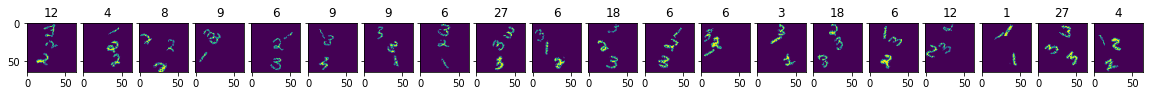

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid                         #To plot the images in grid and we have seen it befoer 

x = np.load('x_train.npy') #11,000 x 64 x 64
y = np.load('y_train.npy')
def plot_digits(x,y):
    num_plots = x.shape[0]
    fig = plt.figure(figsize=(num_plots, 10.*num_plots))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, num_plots), axes_pad=0.1)
    for i in range(num_plots):
        grid[i].imshow(x[i].reshape((64,64)))
        grid[i].set_title(str(y[i]))
    plt.show()
plot_digits(x[:20], y[:20])  #plot 20 first instances in the dataset 

## Step 2 - preprocessing 

Your report should contain any potential preprocessing that you have done on the dataset. If you haven't performed any preprocessing, please leave this empty. This includes any sample code that you will use. 

In [ ]:
# your code here

# Step 3 - the model and its training
This is the main part of your report. Below we provide an example, where we apply a logistic regression model to the dataset, and we get a very bad accuracy. You can do much better! You also have to use a deep learning package in your solution. Provide the explanation for your model and its training below. 

## 3.1 example code (not using pyTorch)
The code below shows the performance of a logistic regression model which will be used as a base model in this case. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
features = x.reshape(11000,-1) #vectorizing the input image
labels = y.reshape(-1,1)
x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size=0.33, random_state=42) #set aside for validation
clf = LogisticRegression()
clf.fit(x_train,y_train)
predictions = clf.predict(x_val)
accuracy = accuracy_score(y_val, predictions)
print("The validation accuracy of the model is", accuracy*100, '%')

The validation accuracy of the model is 16.225895316804408 %


## 3.2 your model!

 You should choose the final learning model that you have used to submit your solutions to Kaggle. For your chosen model provide the implementation code in this notebook along with the detail. Details should include the architecture and the choice of hyperparameters. If you performed a hyperparameter search you should explain it here.

you can start here in the same cell!


**I. Imports and DataSet Loading**

The following sections imports all the necessary torch functions that may be useful when building a torch Convolutional Neural Network

In [3]:
## your implementation goes here!
from __future__ import print_function
import pickle as pkl
import numpy as np
import argparse
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import warnings
import scipy

The following section creates the training data sets, using x and y as they were defined above. I kept batch_size at 4 as the tutorial did, shuffling the example to be sure they wouldn't be sorted. I created the trainset and trainloader than will be used for the training, in the same way the tutorial did. 

In [4]:
class NumberSquare(torch.utils.data.Dataset):

  def __init__(self):
    self.x=torch.tensor(x)
    self.y=torch.tensor(y)
    self.n_plots=x.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_plots

trainset=NumberSquare()
trainloader=torch.utils.data.DataLoader(dataset=trainset, batch_size=4, shuffle=True, num_workers=2)

**II. Creating the Nets**

Instead of creating 1 network for the task, I created 3: net_A, net_B and net_C. They are all identical and follow the same model described below, but they are trained independently: given the same batch of data, they have independent optimizers and weight updates. Over a high number of epochs, each network begins to have its own identity. The nets only work together during the test phase, in which they 'vote' for the best output by choosing the one that is endorsed by the most nets. 

My networks directly computes the products, without going through an individual-digit localization & identification stage: I did this so I could focus all of my efforts on maximally improving a single model of network. Therefore, my networks performs a classification tasks with 10 different classes corresponding to the 10 possible products [1, 2, 3, 4, 6, 8, 9, 12, 18, 27].

The following section creates the list of classes, here the 10 different possible products. I will explain further down how this list is used. I also added the img_show function from the tutorial.



In [5]:
products=(1,2,3,4,6,8,9,12,18,27)

import matplotlib.pyplot as plt

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Then, the following piece of code contains the implementation of the net. 

For the exact parameters of the net, they were found through trial-and-error.
The first test I did had two convolutional layers and only reached about 47% accuracy. I progressively added layers, and gained some more precision: I stopped at 5 convolutional layers and 4 linear ones as any more layers would have made the program became too slow and hard to test or improve.

For the choice of the number of outputs for each layer, I augmented it along the layers as recommended by the CNN architecture tutorial provided by the class. I also read this article https://www.kaggle.com/code/cdeotte/how-to-choose-cnn-architecture-mnist/notebook to have a rough ideas of the numbers I would have to use. However I knew I would have to increase them and add more layers as the CNN presented there only classified one single digit, and my model had to identify 3. Following the advice in the article mentioned above, I also added some dropout. 

I found most of the values and architecture choices here through trial-and-error. Unfortunately CUDA isn't supported on my computer, so it was impossible for me to conduct thorough studies and test 10 different versions of each parameter individually. Therefore, I changed the values progressively based on which changes made me gain the best accuracy, optimizing values as much as I could with limited computational power. 


The finalized product has 5 convolutional layers, the first two are meant to identify the most basic features while the following ones can identify more complex patterns. 
There is max pooling every 2 layers: as the images are small, more pooling would have reduced the size of the output too much. 
I added drop-out every two layers to prevent overfitting, following a trial-and-error process for the choice of where to add dropout, and how much to add. 
Finally there are 4 linear layers, that have diminishing width as shown in the tutorial, until the last layer that has 10 outputs for the 10 classes. Here again, values were found through trial_and_eror.

In [6]:
import pdb
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(1, 32, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64,128,5)
        self.conv4 = nn.Conv2d(128,196,4)
        self.conv5 = nn.Conv2d(196,196,4)
        self.dp3 = nn.Dropout(0.3)
        self.dp2 = nn.Dropout(0.2)
        self.dp1 = nn.Dropout(0.15)
        self.fc1 = nn.Linear(196 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 196)
        self.fc3 = nn.Linear(196, 120)
        self.fc4 = nn.Linear(120, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dp3(x)
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.dp3(x)
        x = F.relu(self.conv5(x))


        x = x.view(-1, 196 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dp2(x)
        x = F.relu(self.fc2(x))
        x = self.dp2(x)
        x = F.relu(self.fc3(x))
        x = self.dp1(x)
        x = self.fc4(x)
        return x

The following block creates the net:

In [ ]:
net_A = Net()
net_B = Net()
net_C = Net()
criterion = nn.CrossEntropyLoss()
optimizer_A = optim.SGD(net_A.parameters(), lr=0.001, momentum=0.9)
optimizer_B = optim.SGD(net_B.parameters(), lr=0.001, momentum=0.9)
optimizer_C = optim.SGD(net_C.parameters(), lr=0.001, momentum=0.9)


**III. Training the Nets**

The 'labellize' takes the labels vector and transforms it into a simple classification vector from 0 to 9 depending on a label's position on the 'products' vector. 

For example labellize_ten([1, 3, 27]) would output [0, 2, 9]

The 'unlabellize' functions does the exact opposite for when I need to reverse classes back to products. 

I could have directly used the products as class numbers, but this would have waisted space: as the products go up to 27, but there are only 10 of them, this would have resulted in 17 unused classes.

In [7]:
def labellize_ten(labels):
  for i in range(labels.size(dim=0)):
    labels[i]=torch.tensor(products.index(labels[i].item()))
  return labels

def unlabellize_ten(labels):
  for i in range(labels.size(dim=0)):
    labels[i]=torch.tensor(products[labels[i].item()])
  return labels

The following block trains the models. 
I did not set the number of epochs in advance: due to the time needed to train the model, it would have been impossible to do a separate one-shot test for each number of epochs. Instead, I run the model straight to 14 epochs, which from experience with my networks was giving satisfying error rates, and then I added epochs 1 or 2 at a time and checked the test accuracy every time.
The training error losses shown below correspond to the 23rd epoch of the 3 networks.
I print the error for each network separately, and for every 400 batches instead of 2000, to have a more precise grasp of how well my neural networks are doing. 

In [ ]:
# Train the network
num_epochs=1
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss_A = 0.0
    running_loss_B = 0.0
    running_loss_C = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs[:, np.newaxis, :, :].float()

        # zero the parameter gradients
        optimizer_A.zero_grad()
        optimizer_B.zero_grad()
        optimizer_C.zero_grad()

        # forward + backward + optimize
        
        outputs_A = net_A(inputs)
        outputs_B = net_B(inputs)
        outputs_C = net_C(inputs)

        labels = labellize_ten(labels)

        loss_A = criterion(outputs_A, labels)
        loss_B = criterion(outputs_B, labels)
        loss_C = criterion(outputs_C, labels)

        loss_A.backward()
        optimizer_A.step()
        loss_B.backward()
        optimizer_B.step()
        loss_C.backward()
        optimizer_C.step()

        # print statistics
        running_loss_A += loss_A.item()
        running_loss_B += loss_B.item()
        running_loss_C += loss_C.item()
        if i % 400 == 399:    # print every 400 mini-batches
            print('[%d, %5d] loss_A: %.3f' %
                  (epoch + 1, i + 1, running_loss_A / 400))
            running_loss_A = 0.0
            print('[%d, %5d] loss_B: %.3f' %
                  (epoch + 1, i + 1, running_loss_B / 400))
            running_loss_B = 0.0
            print('[%d, %5d] loss_C: %.3f' %
                  (epoch + 1, i + 1, running_loss_C / 400))
            running_loss_C = 0.0

print('Finished Training')

[1,   400] loss_A: 0.127
[1,   400] loss_B: 0.140
[1,   400] loss_C: 0.163
[1,   800] loss_A: 0.141
[1,   800] loss_B: 0.116
[1,   800] loss_C: 0.227
[1,  1200] loss_A: 0.186
[1,  1200] loss_B: 0.266
[1,  1200] loss_C: 0.148
[1,  1600] loss_A: 0.214
[1,  1600] loss_B: 0.274
[1,  1600] loss_C: 0.104
[1,  2000] loss_A: 0.223
[1,  2000] loss_B: 0.188
[1,  2000] loss_C: 0.183
[1,  2400] loss_A: 0.211
[1,  2400] loss_B: 0.230
[1,  2400] loss_C: 0.221
Finished Training


# Step 4 - accuracy metrics and CSV submission to Kaggle

Here you can report accuracy metrics for the training and test sets. If you set aside a validation set you can report your accuracy on that set. Other plots such as training-validation loss plot over the training period can also be interesting to see here. A minimum here is the accuracy on the first half of the test set. **this number should match your public leaderboard accuracy**. If this is not the case then your predictions here do not match what you reported on Kaggle and your submission is discarded! This is because otherwise we can't establish that this code was used to produce the result of the leaderboard. Below we show this minimal report for the logistic regression classifier that we trained above.

**Method to Get Results**

In order to get the best results I could, I knew I would need more than 3 networks. Therefore, I proceeded in the following way:
- I trained my 3-networks system through all 1 to 30 epochs using the training method described above (incrementing the number of epochs by 1, 2 or 3)
- Along the way, I saved certain models. First, I saved the first models I obtained that scored above 92%, at epoch 14. At that stage, I knew my neural networks probably would not have had enough time to overfit the training set too strongly, so I thought it would be useful to keep them for later. Then, I saved all my best models, that had above 93% accuracy on test set: at epochs 17, 18, 20, 21, 22, and 23. I did not take any epochs further as accuracy started to decrease: I did not want any strongly overfitting epochs in my final set. 
- For the final test score, I loaded all the networks I had saved and computed precedently. This gave me a total of 21 voting networks: A, B and C from epochs 14, 17, 18, 20, 21, 22, 23. I then used them to vote for the best output: each network would compute its outputs, and the outputs that were the most voted for each input were kept in the final set. 
- I tested the accuracy of the final 21-networks models

Here is the block that laods all the networks

In [8]:
net_A14 = Net()
net_B14 = Net()
net_C14 = Net()

net_A17 = Net()
net_B17 = Net()
net_C17 = Net()

net_A18 = Net()
net_B18 = Net()
net_C18 = Net()

net_A20 = Net()
net_B20 = Net()
net_C20 = Net()

net_A21 = Net()
net_B21 = Net()
net_C21 = Net()

net_A22 = Net()
net_B22 = Net()
net_C22 = Net()

net_A23 = Net()
net_B23 = Net()
net_C23 = Net()

net_A14.load_state_dict(torch.load('model_net_A_14.pth'))
net_B14.load_state_dict(torch.load('model_net_B_14.pth'))
net_C14.load_state_dict(torch.load('model_net_C_14.pth'))

net_A17.load_state_dict(torch.load('model_net_A_17.pth'))
net_B17.load_state_dict(torch.load('model_net_B_17.pth'))
net_C17.load_state_dict(torch.load('model_net_C_17.pth'))

net_A18.load_state_dict(torch.load('model_net_A_18.pth'))
net_B18.load_state_dict(torch.load('model_net_B_18.pth'))
net_C18.load_state_dict(torch.load('model_net_C_18.pth'))

net_A20.load_state_dict(torch.load('model_net_A_20.pth'))
net_B20.load_state_dict(torch.load('model_net_B_20.pth'))
net_C20.load_state_dict(torch.load('model_net_C_20.pth'))

net_A21.load_state_dict(torch.load('model_net_A_21.pth'))
net_B21.load_state_dict(torch.load('model_net_B_21.pth'))
net_C21.load_state_dict(torch.load('model_net_C_21.pth'))

net_A22.load_state_dict(torch.load('model_net_A_22.pth'))
net_B22.load_state_dict(torch.load('model_net_B_22.pth'))
net_C22.load_state_dict(torch.load('model_net_C_22.pth'))

net_A23.load_state_dict(torch.load('model_net_A_23.pth'))
net_B23.load_state_dict(torch.load('model_net_B_23.pth'))
net_C23.load_state_dict(torch.load('model_net_C_23.pth'))

<All keys matched successfully>

In [9]:
x_test = np.load('x_test.npy') #9,000 x 64 x 64
x_test_half = x_test[:4500] #the first half for which you have the true labels
y_test_half = np.load('y_test.npy') #length 4,500: you only have the true lable for the first half of the dataset 

predictions = clf.predict(np.reshape(x_test_half, (4500,-1)))
accuracy = accuracy_score(y_test_half, predictions)
print("The accuracy of the model that should match the public leaderboard accuracy is", accuracy*100, '%')


The accuracy of the model that should match the public leaderboard accuracy is 15.666666666666668 %


Here is the block that computes the accuracy of the whole model on the test set

In [12]:
# >>> your code printing the test error on x_test_half

class NumberSquareTest(torch.utils.data.Dataset):

  def __init__(self):
    self.x=torch.tensor(x_test_half)
    self.y=torch.tensor(y_test_half)
    self.n_plots=x_test_half.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_plots

testset=NumberSquareTest()
testloader=torch.utils.data.DataLoader(dataset=testset, batch_size=4, shuffle=True, num_workers=2)

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images=images[:, np.newaxis, :, :].float()

        outputs_A14=net_A14(images)
        outputs_B14=net_B14(images)
        outputs_C14=net_C14(images)

        outputs_A17=net_A17(images)
        outputs_B17=net_B17(images)
        outputs_C17=net_C17(images)

        outputs_A18=net_A18(images)
        outputs_B18=net_B18(images)
        outputs_C18=net_C18(images)

        outputs_A20=net_A20(images)
        outputs_B20=net_B20(images)
        outputs_C20=net_C20(images)

        outputs_A21=net_A21(images)
        outputs_B21=net_B21(images)
        outputs_C21=net_C21(images)

        outputs_A22=net_A22(images)
        outputs_B22=net_B22(images)
        outputs_C22=net_C22(images)

        outputs_A23=net_A23(images)
        outputs_B23=net_B23(images)
        outputs_C23=net_C23(images)

        labels = labellize_ten(labels)

        _, predicted_A14 = torch.max(outputs_A14.data, 1)
        _, predicted_B14 = torch.max(outputs_B14.data, 1)
        _, predicted_C14 = torch.max(outputs_C14.data, 1)

        _, predicted_A17 = torch.max(outputs_A17.data, 1)
        _, predicted_B17 = torch.max(outputs_B17.data, 1)
        _, predicted_C17 = torch.max(outputs_C17.data, 1)

        _, predicted_A18 = torch.max(outputs_A18.data, 1)
        _, predicted_B18 = torch.max(outputs_B18.data, 1)
        _, predicted_C18 = torch.max(outputs_C18.data, 1)

        _, predicted_A20 = torch.max(outputs_A20.data, 1)
        _, predicted_B20 = torch.max(outputs_B20.data, 1)
        _, predicted_C20 = torch.max(outputs_C20.data, 1)

        _, predicted_A21 = torch.max(outputs_A21.data, 1)
        _, predicted_B21 = torch.max(outputs_B21.data, 1)
        _, predicted_C21 = torch.max(outputs_C21.data, 1)

        _, predicted_A22 = torch.max(outputs_A22.data, 1)
        _, predicted_B22 = torch.max(outputs_B22.data, 1)
        _, predicted_C22 = torch.max(outputs_C22.data, 1)

        _, predicted_A23 = torch.max(outputs_A23.data, 1)
        _, predicted_B23 = torch.max(outputs_B23.data, 1)
        _, predicted_C23 = torch.max(outputs_C23.data, 1)

        p_A14=predicted_A14.numpy()
        p_B14=predicted_B14.numpy()
        p_C14=predicted_C14.numpy()

        p_A17=predicted_A17.numpy()
        p_B17=predicted_B17.numpy()
        p_C17=predicted_C17.numpy()

        p_A18=predicted_A18.numpy()
        p_B18=predicted_B18.numpy()
        p_C18=predicted_C18.numpy()

        p_A20=predicted_A20.numpy()
        p_B20=predicted_B20.numpy()
        p_C20=predicted_C20.numpy()

        p_A21=predicted_A21.numpy()
        p_B21=predicted_B21.numpy()
        p_C21=predicted_C21.numpy()

        p_A22=predicted_A22.numpy()
        p_B22=predicted_B22.numpy()
        p_C22=predicted_C22.numpy()

        p_A23=predicted_A23.numpy()
        p_B23=predicted_B23.numpy()
        p_C23=predicted_C23.numpy()

        p_ABC=np.concatenate(([p_A14],[p_B14],[p_C14],[p_A17],[p_B17],[p_C17],[p_A18],[p_B18],[p_C18],[p_A20],[p_B20],[p_C20],[p_A21],[p_B21],[p_C21],[p_A22],[p_B22],[p_C22],[p_A23],[p_B23],[p_C23]))
        predicted,_=scipy.stats.mode(p_ABC)
        predicted=torch.tensor(predicted[0])
        total += labels.size(0)
        predicted=unlabellize_ten(predicted)
        labels=unlabellize_ten(labels)
        correct += torch.diagonal((predicted == labels)).sum().item()
        if total%500==0:
          print(str(total)+' test images predicted with current accuracy of '+str(correct/total))

print('Accuracy of the network on the 4500 test images: %d %%' % (
    100 * (correct / total)))
# <<< your code here

500 test images predicted with current accuracy of 0.956
1000 test images predicted with current accuracy of 0.964
1500 test images predicted with current accuracy of 0.9666666666666667
2000 test images predicted with current accuracy of 0.968
2500 test images predicted with current accuracy of 0.9684
3000 test images predicted with current accuracy of 0.9686666666666667
3500 test images predicted with current accuracy of 0.9691428571428572
4000 test images predicted with current accuracy of 0.9695
4500 test images predicted with current accuracy of 0.9684444444444444
Accuracy of the network on the 4500 test images: 96 %


In order to submit your results to Kaggle you need to provide your predictions in CSV format. The code below shows how we do this for the example of logistic regression above. You can use the same method for your submission. Note that we need you to submit your result for the **entire test set** of size 9000. Your accuracy on the first half will show on the public leaderboard and the second half is on the private leaderboard that will be revealed when the competition is over. Submit the `predicted_labels.csv` to the Kaggle competition!  

In [ ]:
import pandas as pd #you need to install pandas - also checkout what this package is good for while at it :]
def generate_csv_kaggle(y):
    indexes = np.arange(len(y))
    csv_labels = np.concatenate((indexes.reshape(-1,1), y.reshape(-1,1)),axis=1)
    df = pd.DataFrame(csv_labels,columns=['Id','Category'])
    df['Id'] = df['Id'].astype(str)
    df['Category'] = df['Category'].astype(str)
    df.to_csv('predicted_labels.csv',index=False)
    pass

yh_test = clf.predict(np.reshape(x_test, (9000,-1))) #prediction of the model for the entire training set
generate_csv_kaggle(yh_test)

Here is the block of code that will create the final file, with the same logic as the accuracy block.

In [ ]:
from scipy.linalg.decomp_svd import zeros
x_test = np.load('x_test.npy') #9,000 x 64 x 64


class FinalTest(torch.utils.data.Dataset):

  def __init__(self):
    self.x=torch.tensor(x_test)
    self.n_plots=x_test.shape[0]

  def __getitem__(self, index):
    return self.x[index]

  def __len__(self):
    return self.n_plots

final_testset=FinalTest()
final_testloader=torch.utils.data.DataLoader(dataset=final_testset, batch_size=4, shuffle=False, num_workers=2)

computed=0
yp_test=[]
with torch.no_grad():
    for data in final_testloader:
        images = data
        images=images[:, np.newaxis, :, :].float()

        outputs_A14=net_A14(images)
        outputs_B14=net_B14(images)
        outputs_C14=net_C14(images)

        outputs_A17=net_A17(images)
        outputs_B17=net_B17(images)
        outputs_C17=net_C17(images)

        outputs_A18=net_A18(images)
        outputs_B18=net_B18(images)
        outputs_C18=net_C18(images)

        outputs_A20=net_A20(images)
        outputs_B20=net_B20(images)
        outputs_C20=net_C20(images)

        outputs_A21=net_A21(images)
        outputs_B21=net_B21(images)
        outputs_C21=net_C21(images)

        outputs_A22=net_A22(images)
        outputs_B22=net_B22(images)
        outputs_C22=net_C22(images)

        outputs_A23=net_A23(images)
        outputs_B23=net_B23(images)
        outputs_C23=net_C23(images)

        _, predicted_A14 = torch.max(outputs_A14.data, 1)
        _, predicted_B14 = torch.max(outputs_B14.data, 1)
        _, predicted_C14 = torch.max(outputs_C14.data, 1)

        _, predicted_A17 = torch.max(outputs_A17.data, 1)
        _, predicted_B17 = torch.max(outputs_B17.data, 1)
        _, predicted_C17 = torch.max(outputs_C17.data, 1)

        _, predicted_A18 = torch.max(outputs_A18.data, 1)
        _, predicted_B18 = torch.max(outputs_B18.data, 1)
        _, predicted_C18 = torch.max(outputs_C18.data, 1)

        _, predicted_A20 = torch.max(outputs_A20.data, 1)
        _, predicted_B20 = torch.max(outputs_B20.data, 1)
        _, predicted_C20 = torch.max(outputs_C20.data, 1)

        _, predicted_A21 = torch.max(outputs_A21.data, 1)
        _, predicted_B21 = torch.max(outputs_B21.data, 1)
        _, predicted_C21 = torch.max(outputs_C21.data, 1)

        _, predicted_A22 = torch.max(outputs_A22.data, 1)
        _, predicted_B22 = torch.max(outputs_B22.data, 1)
        _, predicted_C22 = torch.max(outputs_C22.data, 1)

        _, predicted_A23 = torch.max(outputs_A23.data, 1)
        _, predicted_B23 = torch.max(outputs_B23.data, 1)
        _, predicted_C23 = torch.max(outputs_C23.data, 1)

        p_A14=predicted_A14.numpy()
        p_B14=predicted_B14.numpy()
        p_C14=predicted_C14.numpy()

        p_A17=predicted_A17.numpy()
        p_B17=predicted_B17.numpy()
        p_C17=predicted_C17.numpy()

        p_A18=predicted_A18.numpy()
        p_B18=predicted_B18.numpy()
        p_C18=predicted_C18.numpy()

        p_A20=predicted_A20.numpy()
        p_B20=predicted_B20.numpy()
        p_C20=predicted_C20.numpy()

        p_A21=predicted_A21.numpy()
        p_B21=predicted_B21.numpy()
        p_C21=predicted_C21.numpy()

        p_A22=predicted_A22.numpy()
        p_B22=predicted_B22.numpy()
        p_C22=predicted_C22.numpy()

        p_A23=predicted_A23.numpy()
        p_B23=predicted_B23.numpy()
        p_C23=predicted_C23.numpy()

        p_ABC=np.concatenate(([p_A14],[p_B14],[p_C14],[p_A17],[p_B17],[p_C17],[p_A18],[p_B18],[p_C18],[p_A20],[p_B20],[p_C20],[p_A21],[p_B21],[p_C21],[p_A22],[p_B22],[p_C22],[p_A23],[p_B23],[p_C23]))
        predicted,_=scipy.stats.mode(p_ABC)
        predicted=torch.tensor(predicted[0])
        npredictions=predicted.numpy()
        predicted=unlabellize_ten(predicted)
        yp_test=np.concatenate((yp_test, npredictions),axis=0)
        computed+=4
        if computed%500==0:
          print('Computed '+str(computed)+' images')
final_y=yp_test.astype(int)

def regenerate_csv_kaggle(y):
    indexes = np.arange(len(y))
    csv_labels = np.concatenate((indexes.reshape(-1,1), y.reshape(-1,1)),axis=1)
    df = pd.DataFrame(csv_labels,columns=['Id','Category'])
    df['Id'] = df['Id'].astype(str)
    df['Category'] = df['Category'].astype(str)
    df.to_csv('torch_ABC7_predicted_labels.csv',index=False)
    pass

regenerate_csv_kaggle(final_y)

**Appendix: Code for testing the 3 networks**

In this section, I show the test_block I used to compute the accuracy of each set of 3 networks after the desired number of epochs. 

In [ ]:
# >>> your code printing the test error on x_test_half
class NumberSquareTest(torch.utils.data.Dataset):

  def __init__(self):
    self.x=torch.tensor(x_test_half)
    self.y=torch.tensor(y_test_half)
    self.n_plots=x_test_half.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_plots

testset=NumberSquareTest()
testloader=torch.utils.data.DataLoader(dataset=testset, batch_size=4, shuffle=True, num_workers=2)

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images=images[:, np.newaxis, :, :].float()
        outputs_A=net_A(images)
        outputs_B=net_A(images)
        outputs_C=net_A(images)
        labels = labellize_ten(labels)
        _, predicted_A = torch.max(outputs_A.data, 1)
        _, predicted_B = torch.max(outputs_B.data, 1)
        _, predicted_C = torch.max(outputs_C.data, 1)
        p_A=predicted_A.numpy()
        p_B=predicted_B.numpy()
        p_C=predicted_C.numpy()
        p_ABC=np.concatenate(([p_A],[p_B],[p_C]))
        predicted,_=scipy.stats.mode(p_ABC)
        predicted=torch.tensor(predicted[0])
        total += labels.size(0)
        predicted=unlabellize_ten(predicted)
        labels=unlabellize_ten(labels)
        correct += torch.diagonal((predicted == labels)).sum().item()

print('Accuracy of the network on the 4500 test images: %d %%' % (
    100 * round((correct / total), 6)))
# <<< your code here